# Financial Inclusion in East Africa Regression Model

For this analysis we modeled the likelihood of an East African having a bank account in the data set (https://zindi.africa/competitions/financial-inclusion-in-africa/data). 



Authors: Eric Cheruiyot, Joseph Leshakwet, Geoffrey Ongeri

Date: 5 october 2022

Predicting the likelihood of an individual having a bank account in East Africa



### Objectives

The goal is to accurately predict the likelihood that an individual has a bank account or not, i.e. Yes = 1, No = 0.

### Experimental Design

Below are the steps conducted in this analysis.

1. Load and preview the data.
2. Data Cleaning (check for and deal with outliers,checking for anomalies, messy column names, values and missing data)
3. Univariate Analysis
4. Bivariate Analysis
5. Multivariate Analysis
6. Implementing the Solution by performing the respective analysis i.e.fitting logistic regression model to test data.

### Data Validation

The main dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.



### Understanding our data:

We have a dataset that contains the following columns:

1. country:interviewee country
2. year: Year survey was done in.
3. uniqueid: Unique identifier for each interviewee
4. bank_account : Yes , No
5. location_type:Type of location: Rural, Urban
6. cellphone_access: If interviewee has access to a cellphone: Yes, No
7. household_size: Number of people living in one house
8. age_of_respondent: The age of the interviewee
9. gender_of_respondent: Gender of interviewee: Male, Female
10. relationship_with_head: The interviewee's relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Don't know
11. marital_status: The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know
12. education_level: Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Don't know/RTA
13. job_type :Interviewee has Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Don't Know/Refuse to answer

Import packages required

In [231]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import bokeh as bk

Import the data

In [232]:
#Load our dataset
#This is our dataset : https://zindi.africa/competitions/financial-inclusion-in-africa/data
train_set = pd.read_csv("Train.csv")
test_set = pd.read_csv("Test.csv")

Check our first five records in training set data

In [233]:

#Check our first five records in training set data
train_set.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Check our last five records in training set data

In [234]:
#Check our last five records in training set data
train_set.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


Check sample records in training set data

In [235]:
#Check sample records in training set data
train_set.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
12267,Rwanda,2016,uniqueid_6200,No,Rural,Yes,6,36,Female,Spouse,Married/Living together,Primary education,Self employed
4085,Kenya,2018,uniqueid_4086,No,Rural,No,6,39,Female,Head of Household,Married/Living together,Secondary education,Farming and Fishing
8882,Rwanda,2016,uniqueid_2815,Yes,Urban,Yes,4,26,Male,Child,Single/Never Married,Tertiary education,Remittance Dependent
16553,Tanzania,2017,uniqueid_1751,No,Urban,Yes,2,20,Female,Spouse,Single/Never Married,Primary education,Self employed
8038,Rwanda,2016,uniqueid_1971,No,Rural,Yes,3,35,Male,Head of Household,Married/Living together,Secondary education,Informally employed


Check datatypes of our columns

In [236]:
#Check datatypes of our columns
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


Description of our data .describe(include =all) will give descriptive statistics of bothe categorical and numerical data

In [237]:
#Description of our data .describe(include =all) will give descriptive statistics of bothe categorical and numerical data
train_set.describe(include='all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN



From summary statistics of numerical variables we see that the there are total of 23524 respondents, the mean value,min value and maximum value is of household size is 3.797,0.0 and 21.0 respectiveely, while the mean value,min value and maximum value of respondent age is 38.8,16.0 and 100.0 respectively.






### Exploratory Data Analysis

Univariate Analysis

Count the number of respondents who can access bank accounts and those who can not access bank accounts(we need only analyze those that can access bank accounts):




In [238]:
print(train_set[train_set['bank_account'] == 'Yes']['bank_account'].count())
print(train_set[train_set['bank_account'] == 'No']['bank_account'].count())

3312
20212


3312 people had access to bank accounts while 20212 did not have access to bank accounts

<AxesSubplot:title={'center':'Freq dist of bank account access'}>

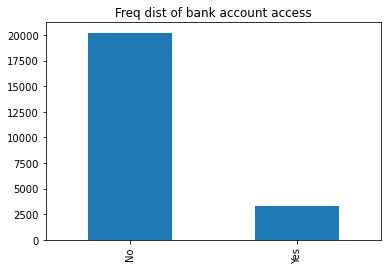

In [239]:
#Has access to bank account column is a categorical variable
#For categorical columns we plot histograms, we use the value_count() and plot.bar() functions to draw a bar plot,
train_set.bank_account.value_counts().plot.bar(title='Freq dist of bank account access')

The graph cleary shows that there are more people who did not access bank accounts as compared to those who accessed bank . 

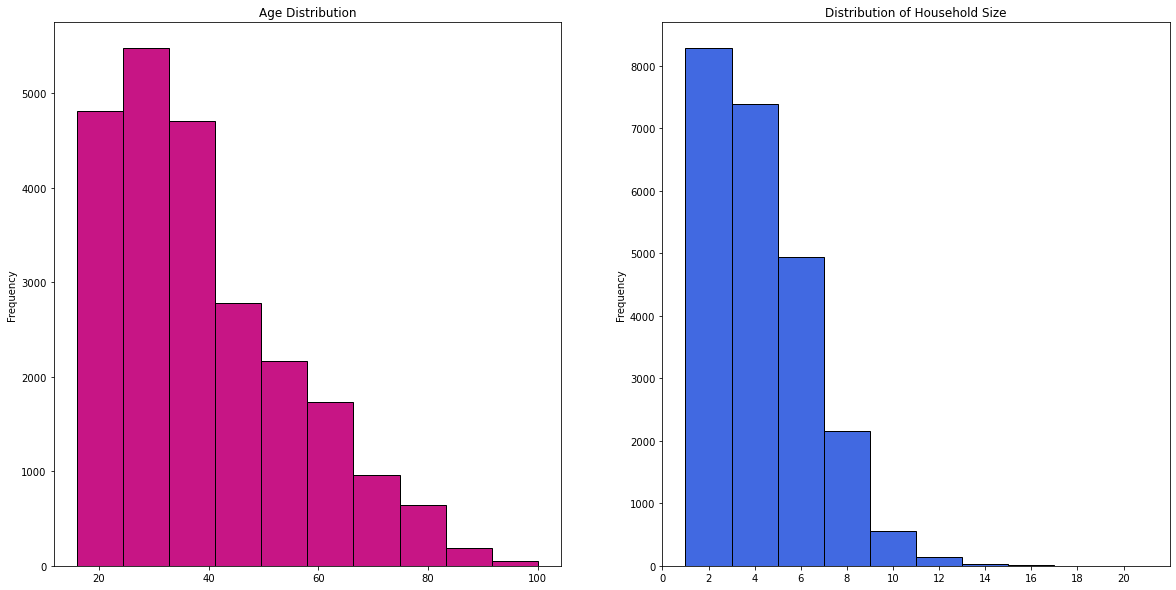

In [240]:
#Next, we can plot a histogram to show the distribution of 
# age and household size in the dataset
fig,ax=plt.subplots(1,2,figsize=(20,10))
train_set['age_of_respondent'].plot.hist(ax=ax[0],edgecolor='black',color='mediumvioletred')
ax[0].set_title('Age Distribution')
x1=np.arange(0,train_set['age_of_respondent'].max()+0.5,10)
plt.xticks(x1)
train_set['household_size'].plot.hist(ax=ax[1],color='royalblue',bins=10,edgecolor='black')
ax[1].set_title('Distribution of Household Size')
x2=np.arange(0,train_set['household_size'].max(),2)
ax[1].set_xticks(x2)
plt.show()

From above histograms there were more individuals aged between 24 and 33 as compared to those aged above 80 years.Its also noted that the number of people who participated in the survey decreased constantly with increase in years.

From the histogram showing household size, there are more families with household size of between 0-6 than between 8-18

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location_type', ylabel='count'>

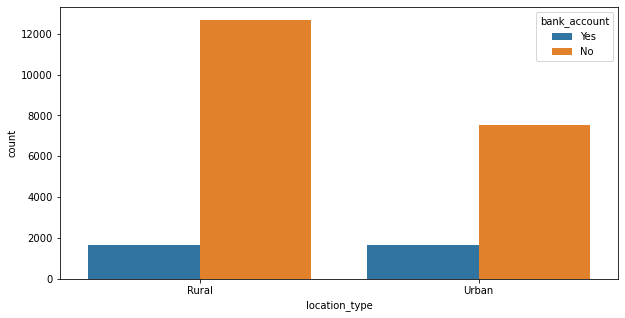

In [241]:
#plot bar chart comparing bank account status and numbers in rural and urban areas
fig = plt.figure(figsize = (10,5))
plot.set_title("bak account vs location count chart ", fontsize = 15)
sns.countplot('location_type', hue= 'bank_account', data=train_set)

Its cleary seen that individuals did not have access to bank accounts. Also most people who where involved in the study came from rural areas

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship_with_head', ylabel='count'>

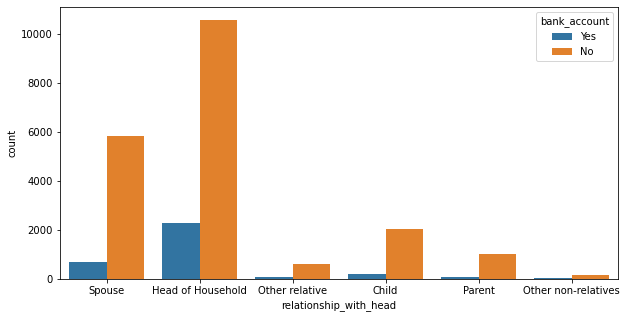

In [242]:
#plot chart of relationship with head vs bank account
fig = plt.figure(figsize = (10,5))
sns.countplot('relationship_with_head', hue= 'bank_account', data=train_set)

C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


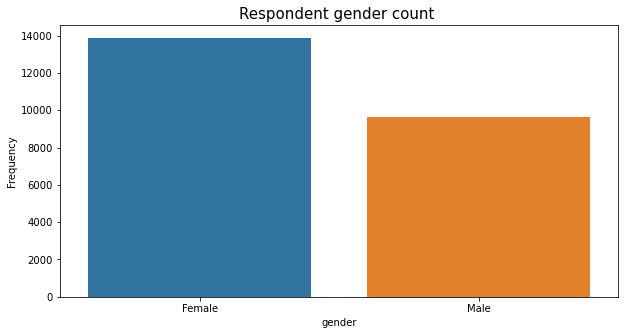

In [243]:
#plot chart of Respondent gender count
fig = plt.figure(figsize = (10,5)) # Just so we can set figure size
plot = sns.countplot(train_set.gender_of_respondent)
plot.set_title("Respondent gender count ", fontsize = 15)
plot.set(xlabel='gender', ylabel='Frequency')
plt.show()

More women were interviewed than men.

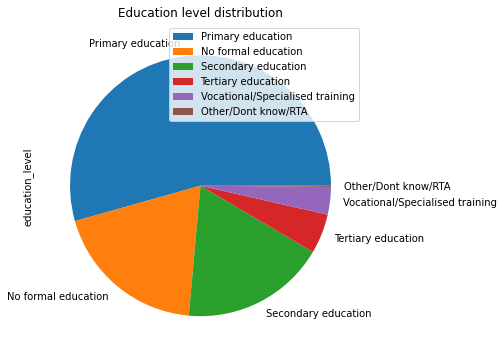

In [244]:
#plotting pie chart to show education level distribution across countries
plot = train_set.education_level.value_counts().plot(kind = "pie", figsize = (6,6),legend=True)
plot.set_title("Education level distribution")

#ploting pie chats to show gender of respondent with respect to male and female and type of location-rural/urban
fig = plt.figure(figsize=(18,10), dpi=1600)
#1 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(train_set['gender_of_respondent'].value_counts(),
        labels = ['Male','Female'],startangle = 90 , autopct = '%.2f')
plt.title("Pie Chart of respondent's age")

#first row sec column
ax1 = plt.subplot2grid((1,2), (0, 1))
plt.pie(train_set['location_type'].value_counts(),
        labels = ['Rural','Urban'],startangle = 180 , autopct = '%.2f')
plt.title('Pie chart showing Location Type')

plt.show()

It is noted that more men were involved in the survey as compared to females.



C:\Users\Eric\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='count'>

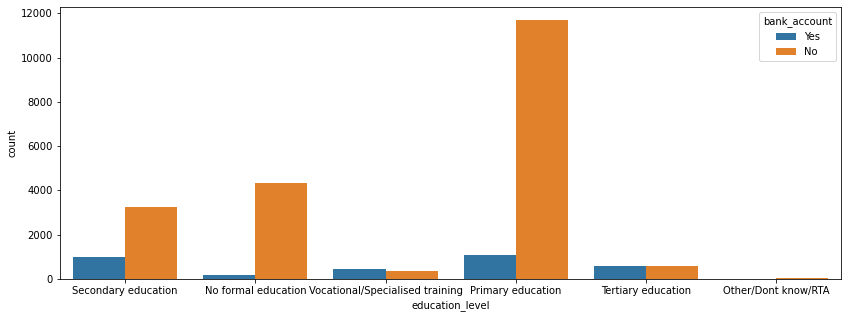

In [245]:
#plot charts comparing education level and bank account status
fig = plt.figure(figsize = (14,5))
plot.set_title("education level vs bank account status chart", fontsize = 15)
sns.countplot('education_level', hue= 'bank_account', data=train_set)

Here many people had their education level up to primary level as compared to those secondary education.

There were also more tertiary education individuals as compared to those who went for vocational/specialised training

<AxesSubplot:>

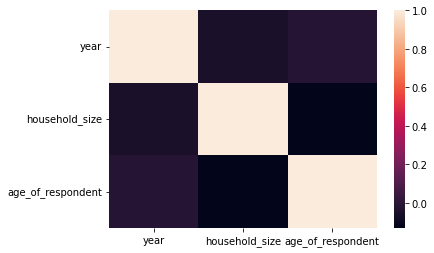

In [246]:
#Checking Co-relation between variables
sns.heatmap(train_set.corr())

We see that age of respondent and the relationship with household size are highly correlated.

The variable household size has strong correlation with the access to bank accounts.


# Logistic Regression 


### Data Preparation

We check for null values and covert response variables (yes and no) to zeros "0" and ones "1".

In [247]:
#checking for null values
train_set.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Zero values for all columns means we don't have any null value in any of the columns so we go ahead with response variable conversion.

In [248]:
#response variable conversion
train_set['bank_account'] = train_set['bank_account'].map({'No': 0, 'Yes': 1})
#check first 5 records
train_set.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


### Define response variable "y"

In [249]:
#define response variable
y = train_set['bank_account']

### Define explanatory variable "x"

In [250]:
#drop unwanted columns
x = train_set.drop(["uniqueid","bank_account","country","job_type",'marital_status','relationship_with_head'], axis = 1)
#check first 5 records
x.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level
0,2018,Rural,Yes,3,24,Female,Secondary education
1,2018,Rural,No,5,70,Female,No formal education
2,2018,Urban,Yes,5,26,Male,Vocational/Specialised training
3,2018,Rural,Yes,5,34,Female,Primary education
4,2018,Urban,No,8,26,Male,Primary education


### Create dummy variables


### Location type: "Urban" = 1, "Rural" = 0

In [251]:
#dummy variables creation
x["location_type"] = x["location_type"].map({'Rural': 0, 'Urban': 1})

### Cellphone access: "Yes" = 1, "No" = 0

In [252]:
#dummy variables creation
x["cellphone_access"] = x["cellphone_access"].map({'No': 0, 'Yes': 1})

### Gender: "Male" = 1, "Female" = 0

In [253]:
#dummy variables creation
x["gender_of_respondent"] = x["gender_of_respondent"].map({'Female': 0, 'Male': 1})

### Let us group all formal education together and no formal education in another group then assign education dummy variables as "Formal education" = 1, "No formal education" = 0

In [254]:
# group all formal education together and no formal education in another group
x['education_level']=np.where(x['education_level'] =='Secondary education', 'Formal education', x['education_level'])
x['education_level']=np.where(x['education_level'] =='Primary education', 'Formal education', x['education_level'])
x['education_level']=np.where(x['education_level'] =='Vocational/Specialised training', 'Formal education', x['education_level'])
x['education_level']=np.where(x['education_level'] =='Tertiary education', 'Formal education', x['education_level'])
x['education_level']=np.where(x['education_level'] =='Other/Dont know/RTA', 'No formal education', x['education_level'])
#dummy variables creation
x['education_level'] = x['education_level'].map({'No formal education': 0, 'Formal education': 1})

### Check our data 

In [255]:
#check first 5 records
x.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level
0,2018,0,1,3,24,0,1
1,2018,0,0,5,70,0,0
2,2018,1,1,5,26,1,1
3,2018,0,1,5,34,0,1
4,2018,1,0,8,26,1,1


### Split data into train and test  sets


Next, we split 70% of the data into training set while 30% of the data to test set using below code.

In [256]:
#import libraries
from sklearn.model_selection import train_test_split 
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
#check row variables count
a=len(x_train)
b=len(x_test)
print(a)
print(b)

16466
7058


In [257]:
### We fit our logistic regression model to train set data.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [258]:
#fitting the model to data
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train,y_train)

LogisticRegression()

In [259]:
#summarry of our logistic model result
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.354340
         Iterations 8
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.121     
Dependent Variable:   bank_account      AIC:               11683.1249
Date:                 2022-10-07 14:00  BIC:               11737.0883
No. Observations:     16466             Log-Likelihood:    -5834.6   
Df Model:             6                 LL-Null:           -6638.6   
Df Residuals:         16459             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
year                 -0.0031   0.0001 -34.5409 0.0000 -0.0032 -0.0029
location_type   

We can see that all p-values very small. Therefore, all variables are significant

### Fit model on test data

In [260]:
#Fitting model to test data
y_pred=logreg.predict(x_test)


### Check model accuracy 

In [261]:
#checking model accuracy
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy = (6035+0)/(6035+1023)
Accuracy

[[6035    0]
 [1023    0]]


0.8550580901105129

### The model is accurate to 85.51%.

In [262]:
#Check error probability
Misclassification = (1023+0)/(6035+1023)
Misclassification 

0.1449419098894871

Model has 14.49% inaccuracy.

### Visualizing confusion matrix

Text(0.5, 257.44, 'Predicted label')

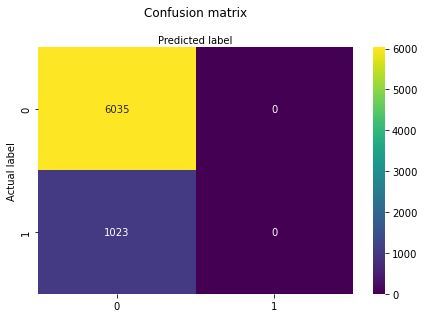

In [263]:
#plot confusion matrix
fig, ax = plt.subplots()
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### The logistic regression model predicts probability of having a bank account in East Africa with an accuracy of 85.51% . 